<a href="https://akademie.datamics.com/kursliste/">![title](bg_datamics_top.png)</a>

<center><em>© Datamics</em></center><br><center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em>

# Rollen und Erweitern

Bei Zeitreihen ist es üblich, Daten aufgrund eines gleitenden Mittelwerts (rolling mean) zu erstellen. Schauen wir uns an, wie man das auf einfache Art und Weise mit Pandas machen kann!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Beste Art, Daten mit Zeitreihenindex zu lesen!
df = pd.read_csv('time_data/walmart_stock.csv',index_col='Date',parse_dates=True)

In [3]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


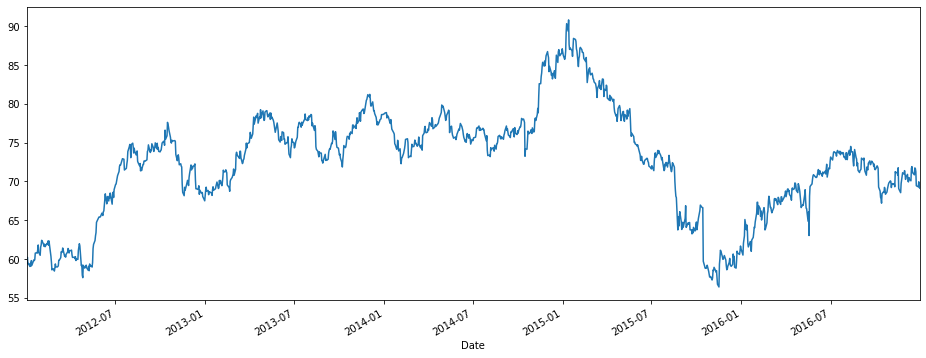

In [4]:
df['Open'].plot(figsize=(16,6))

Fügen wir jetzt einen gleitenden Mittelwert ein! Diese "Rollmethode" bietet Zeileneinträge, wobei jeder Eintrag dann das jeweilige Fenster repräsentiert.

In [5]:
# 7-Tage gleitender Mittelwert
df.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


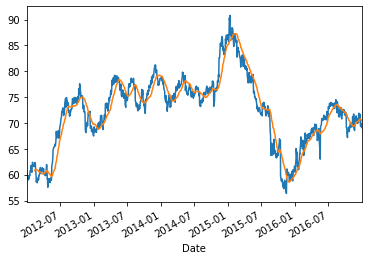

In [6]:
df['Open'].plot()
df.rolling(window=30).mean()['Close'].plot()

Die einfachste Art eine Legende einzufügen ist, den Rollwert in eine eigene Spalte einzufügen. Pandas macht dann den Rest automatisch!

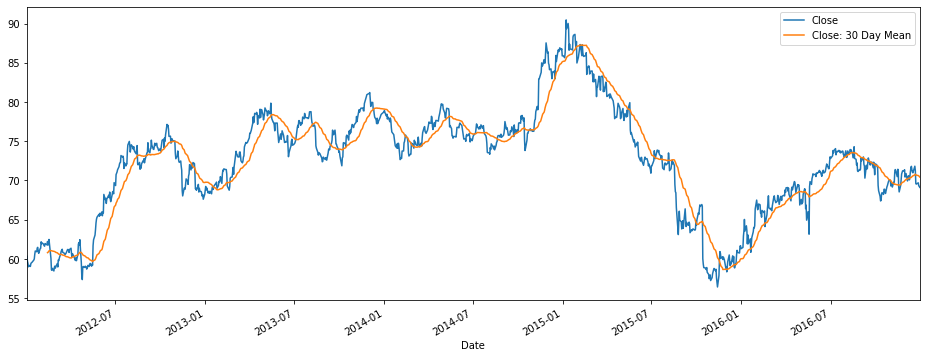

In [7]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

## Erweitern

Was, wenn du alles von Beginn der Zeitreihe an als Rollwert nehmen willst? Sagen wir, Du willst nicht nur 7 Tages- oder monatliche gleitende Mittelwerte, sondern alles von Anfang an in die Berechnung mit hinein nehmen.

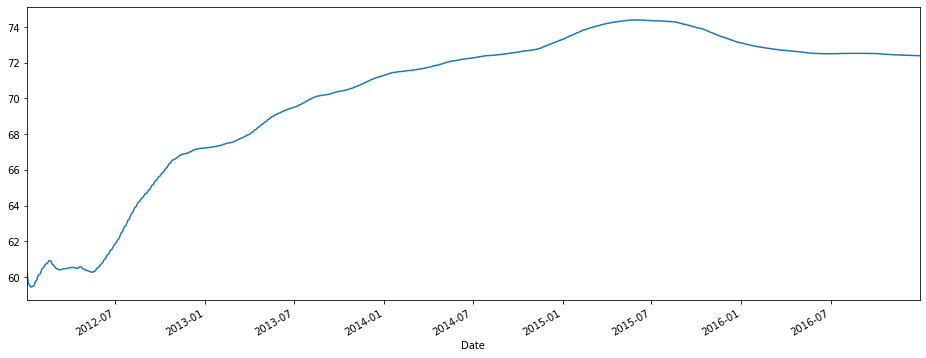

In [8]:
# Optional: Gib eine Mindestanzahl an Perioden an
df['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

## Bollinger  Bänder (Bollinger Bands)

Wir werden noch weiter über Finanzanalysediagramme und technische Indikatoren sprechen, aber das hier ist es wert, dass wir es uns jetzt ansehen!

Mehr Informationen : http://www.investopedia.com/terms/b/bollingerbands.asp

*Entwickelt von John Bollinger sind Bollinger Bänder®  Volatilitätsbänder (volatility bands), die über und unter einem gleitenden Mittelwert platziert werden. Volatilität basiert auf der Standardabweichung, die sich ändert, wenn sich die Volatilität erhöht oder verringert. Die Bänder werden automatisch breiter, wenn die Volatilität steigt und enger, wenn sie sinkt. Diese dynamische Eigenschaft der Bollinger Bänder bedeutet auch, dass sie auf verschiedene Wertpapiere mit Standardeinstellungen angewendet werden können. Bollinger Bänder können bei Signalen benutzt werden, um Hochs und Tiefs oder die Stärke des Trends zu bestimmen.*

*Bollinger Bänder zeigen die Richtung mit dem 20-Perioden SMA (simple moving average) und die Volatilität mit den oberen und unteren Bändern an. Daher können sie benutzt werden, um zu bestimmen, ob Preise eher hoch oder niedrig sind. Laut Bollinger sollen die Bänder 88-89% der Preisaktion beinhalten, was eine Handlung außerhalb der Bänder signifikant macht. Technisch gesehen sind Preise relativ hoch, wenn sie über dem oberen Band liegen und relativ niedrig, wenn sie unter dem unteren liegen. Trotzdem, relativ hoch soll nicht als auf Baisse gerichtet oder als Verkaufssignal verstanden werden. Ebenso sollte relativ niedrig nicht als haussierend oder Kaufsignal interpretiert werden. Preise sind aus einem bestimmten Grund hoch oder niedrig. Genau wie andere Indikatoren sollten Bollinger Bänder nicht als alleiniges Werkzeug verwendet werden.*

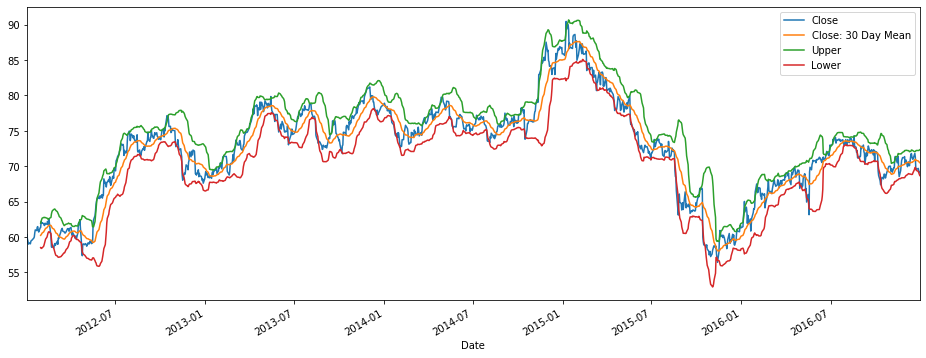

In [9]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=20).mean()
df['Upper'] = df['Close: 30 Day Mean'] + 2*df['Close'].rolling(window=20).std()
df['Lower'] = df['Close: 30 Day Mean'] - 2*df['Close'].rolling(window=20).std()
df[['Close','Close: 30 Day Mean','Upper','Lower']].plot(figsize=(16,6))

Für Erweiterungsoperationen bringt es nicht wirklich viel, diese gegen die täglichen Daten aufzutragen. Aber trotzdem ist es eine gute Art, um zu sehen wie "stabil" eine Aktie ist. Dieses Konzept von Stabilität und Volatilität ist etwas, das wir ausführlich im nächsten Projekt behandeln werden, also legen wir direkt damit los!